In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
saveplots = True

In [2]:
with open('ratings.csv', 'r') as f:
        reader = csv.reader(f)

        user_id = []
        movie_id = []
        rating = []
        
        for row in reader:
            user_id.append(row[0])
            movie_id.append(row[1])
            rating.append(row[2])
movie_id = movie_id[1:]
rating = rating[1:]
user_id = user_id[1:]

### Question 1

#### number of ratings given 

In [3]:
given_ratings = (len(user_id))
print(given_ratings)

100004


In [4]:
unique_users = list(set(user_id))
print(len(unique_users))

671


In [5]:
unique_movies = list(set(movie_id))
print(len(unique_movies))
unique_movies = np.asfarray(unique_movies,int)

9066


#### number of ratings we can have

In [6]:
total_ratings = len(unique_users) * len(unique_movies)
print(total_ratings)

6083286


#### computing Sparsity

In [7]:
sparcity = given_ratings / total_ratings
print(sparcity)

0.016439141608663475


### Question 2

#### Since the ratings are from 0 to 5 and we want intervals of 0.5, we will have 10 bins of data. 

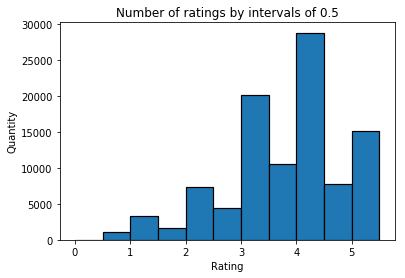

In [11]:
rating_floats = np.array(rating).astype(np.float)
plt.hist(rating_floats, bins=11, range=(0,5.5), edgecolor='black', linewidth=1.2)
plt.title('Number of ratings by intervals of 0.5')
plt.xlabel("Rating")
plt.ylabel("Quantity", rotation=90)
plt.show()

### Question 3

#### every single movie has a rating already in this list. We need to count the number of ratings/movie and sort it. 

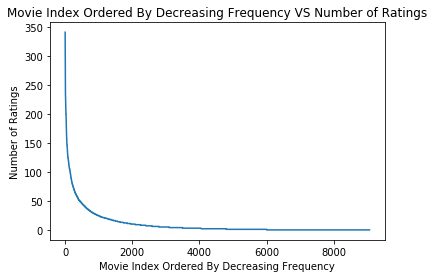

In [9]:
c = Counter(movie_id)
#print(c)
#print("VALUES")
y = sorted(c.values())[::-1]
x = range(0,len(c.values()))
#print('SORTED')
#x = sorted(c.values())
#print(x)
#print('Reversing')
#x_ordered = x[::-1]
#print(x_ordered)
plt.title('Movie Index Ordered By Decreasing Frequency VS Number of Ratings')
plt.xlabel("Movie Index Ordered By Decreasing Frequency")
plt.ylabel("Number of Ratings", rotation=90)
plt.plot(x, y)
plt.show()
#my_count = pd.Series(movie_id[1:]).value_counts()
#my_count
#pd.Series.plot.hist(my_count)

### Question 4

#### Very similar to the movies. 

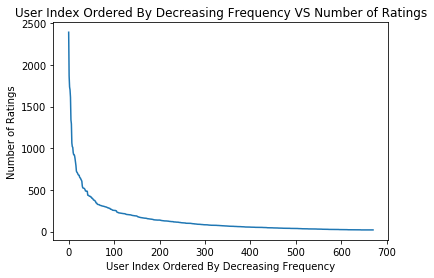

In [10]:
r = Counter(user_id)
y = sorted(r.values())[::-1]
x = range(0,len(r.values()))
plt.title('User Index Ordered By Decreasing Frequency VS Number of Ratings')
plt.xlabel("User Index Ordered By Decreasing Frequency")
plt.ylabel("Number of Ratings", rotation=90)
plt.plot(x, y)
plt.show()

### Question 5

#### Answer this. 

### Question 6

#### Compute the variance of rating values received for each movie. 

In [36]:
variance = []
for i in unique_movies:
    indexes = []
    ratings = []
    for j in range(len(movie_id)):
        if(movie_id[j] == str(int(i))):
            indexes.append(j)
    for k in indexes:
        ratings.append(float(rating[k]))
    variance.append(np.var(ratings))

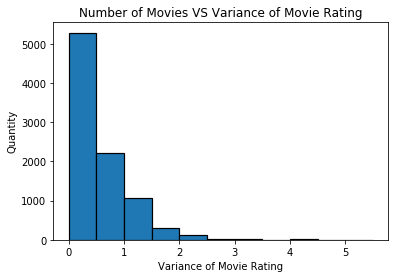

In [12]:
plt.hist(variance, bins=11, range=(0.0,5.5), edgecolor='black', linewidth=1.2)
plt.xlabel('Variance of Movie Rating')
plt.ylabel('Quantity')
plt.title('Number of Movies VS Variance of Movie Rating')
plt.show()

### Question 7

<p> The answer for question 6 is to sum up all of the values of rk and then divide it by the length of Iu. That would be essentially summing up all of the ratings and diving by the number of ratings giving the average rating </p>

### Question 8

<p> Iu intersection Iv are the indeces of movies where both of the users have provided a rating. Yes, Iu intersection Iv can be equal to 0 as both users can rate completely different movies. </p>

### Question 9

<p> The reason for mean centering on user v's rating when predicting user u's rating is because when there are users who rate all movies a 1 or all movies a 5, it skews the data. With the skewed data, predicting user u's rating for the movie will not make sense because it will also skew what value user u would usually assign to a movie and make the probabilty that user u assigns a high rating to that movie just because user v assigns high ratings to all movies or increases the probability that user u assigns a low rating to that movie just because uver v assigns low ratings to all movies. </p>

### Question 10

In [15]:
from surprise import Dataset
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
import os
# Load the movielens-100k dataset (download it if needed).
file_path = os.path.expanduser('/Users/ashwin/Documents/Winter 2018/219/project3/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
k_vals = np.arange(2,102,2)
test_rmse_avg_full = []
test_mae_avg_full = []
sim_options = {'name': 'pearson'}
# Use the KNN algorithm
for k in k_vals:
    print(k)
    algo = KNNBasic(k=k, sim_options=sim_options)
    result = cross_validate(algo, data, measures=[u'rmse', u'mae'], cv=10)
    test_rmse = result['test_rmse']
    test_rmse_avg = np.mean(test_rmse)
    test_rmse_avg_full.append(test_rmse_avg)
    test_mae = result['test_mae']
    test_mae_avg = np.mean(test_mae)
    test_mae_avg_full.append(test_mae_avg)

2
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
4
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing simil

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
24
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done 

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
46
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matr

Done computing similarity matrix.
Done computing similarity matrix.
66
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
68
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity m

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
88
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

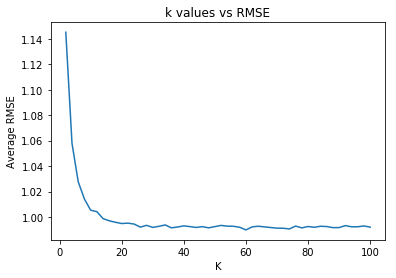

In [16]:
x = k_vals
y = test_rmse_avg_full
plt.title('k values vs RMSE')
plt.xlabel("K")
plt.ylabel("Average RMSE", rotation=90)
plt.plot(x,y)
if saveplots:
    plt.savefig("rmseVsk_Q10", format='png') 
plt.show()

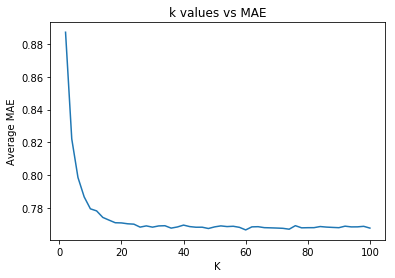

In [17]:
x = k_vals
y = test_mae_avg_full
plt.title('k values vs MAE')
plt.xlabel("K")
plt.ylabel("Average MAE", rotation=90)
plt.plot(x,y)
if saveplots:
    plt.savefig("maeVsk_Q10", format='png') 
plt.show()

### Quesiton 11

<p> As can be seen from the graphs above, the minimum k value is 30 after which the RMSE and the MAE do not go down any further. </p>

### Question 12

#### getting the testing and training set

In [18]:
# movies with less than or equal to 2 ratings
movie_numbers_with_less_than_two_ratings = []
for i in unique_movies:
    indexes = []
    for j in range(len(movie_id)):
        if(movie_id[j] == str(int(i))):
            indexes.append(j)
    if len(indexes) <= 2:
        movie_numbers_with_less_than_two_ratings.append(i)

In [19]:
movie_ints = [int(i) for i in movie_numbers_with_less_than_two_ratings]

In [21]:
def trim_movies_less_than_2(testset):
    removed_testset = []
    for j in range(len(testset)):
        if int(testset[j][1]) not in movie_ints:
            removed_testset.append(testset[j])
    return removed_testset

In [32]:
from surprise import Dataset
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold
k_vals = np.arange(2,102,2)
test_rmse_avg_full = []
test_mae_avg_full = []
sim_options = {'name': 'pearson'}
kf = KFold(n_splits=10)
file_path = os.path.expanduser('/Users/ashwin/Documents/Winter 2018/219/project3/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
for k in k_vals:
    print(k)
    test_rmse = []
    test_mae = []
    for trainset, testset in kf.split(data):
        removed_testset = trim_movies_less_than_2(testset)
        algo = KNNBasic(k=k, sim_options=sim_options)
        algo.fit(trainset)
        predictions = algo.test(removed_testset)
        test_rmse.append(accuracy.rmse(predictions))
        test_mae.append(accuracy.mae(predictions))
    test_rmse_avg_full.append(np.mean(test_rmse))
    test_mae_avg_full.append(np.mean(test_mae))



2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1468
MAE:  0.8827
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1481
MAE:  0.8873
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1447
MAE:  0.8881
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1350
MAE:  0.8813
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1360
MAE:  0.8789
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1288
MAE:  0.8724
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1409
MAE:  0.8824
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1171
MAE:  0.8655
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1509
MAE:  0.8882
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
RMSE: 0.9924
MAE:  0.7666
18
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9783
MAE:  0.7536
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9714
MAE:  0.7549
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9682
MAE:  0.7544
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9867
MAE:  0.7628
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9763
MAE:  0.7621
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9943
MAE:  0.7692
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9850
MAE:  0.7626
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9730
MAE:  0.7567
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9881
MAE:  0.7685
Computing 

RMSE: 0.9635
MAE:  0.7456
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9832
MAE:  0.7640
34
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9920
MAE:  0.7684
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9664
MAE:  0.7429
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9842
MAE:  0.7638
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9707
MAE:  0.7542
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9767
MAE:  0.7575
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9816
MAE:  0.7617
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9720
MAE:  0.7555
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9749
MAE:  0.7535
Computing the pearson similarity matrix...
D

Done computing similarity matrix.
RMSE: 0.9841
MAE:  0.7624
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9787
MAE:  0.7642
50
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9805
MAE:  0.7576
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9636
MAE:  0.7488
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9634
MAE:  0.7486
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9627
MAE:  0.7470
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9730
MAE:  0.7536
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9806
MAE:  0.7615
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9948
MAE:  0.7724
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9778
MAE:  0.7576
Computing 

RMSE: 0.9778
MAE:  0.7611
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9712
MAE:  0.7514
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9713
MAE:  0.7536
66
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9826
MAE:  0.7612
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9788
MAE:  0.7540
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9795
MAE:  0.7624
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9795
MAE:  0.7591
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9812
MAE:  0.7647
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9624
MAE:  0.7482
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9772
MAE:  0.7585
Computing the pearson similarity matrix...
D

Done computing similarity matrix.
RMSE: 0.9715
MAE:  0.7535
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9696
MAE:  0.7549
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9658
MAE:  0.7468
82
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9732
MAE:  0.7540
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9761
MAE:  0.7576
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9703
MAE:  0.7544
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9580
MAE:  0.7454
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9646
MAE:  0.7525
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9694
MAE:  0.7484
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9871
MAE:  0.7670
Computing 

RMSE: 0.9650
MAE:  0.7473
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9711
MAE:  0.7528
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9669
MAE:  0.7502
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9803
MAE:  0.7619
98
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9823
MAE:  0.7634
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9725
MAE:  0.7505
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9757
MAE:  0.7574
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9802
MAE:  0.7607
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9562
MAE:  0.7442
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9909
MAE:  0.7625
Computing the pearson similarity matrix...
D

In [33]:
min_avg_rmse = np.min(test_rmse_avg_full)
print('Minimum average rmse is: %f' %(min_avg_rmse))

Minimum average rmse is: 0.974928


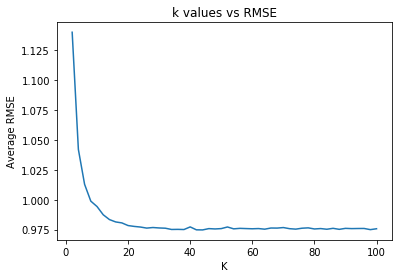

In [24]:
x = k_vals
y = test_rmse_avg_full
plt.title('k values vs RMSE')
plt.xlabel("K")
plt.ylabel("Average RMSE", rotation=90)
plt.plot(x,y)
if saveplots:
    plt.savefig("rmseVsk_Q12", format='png') 
plt.show()

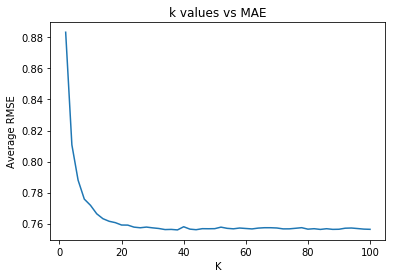

In [25]:
x = k_vals
y = test_mae_avg_full
plt.title('k values vs MAE')
plt.xlabel("K")
plt.ylabel("Average RMSE", rotation=90)
plt.plot(x,y)
if saveplots:
    plt.savefig("maeVsk_Q12", format='png') 
plt.show()

### Question 13

In [26]:
def trim_movies_question13(testset):
    removed_testset = []
    #print(len(testset))
    for j in range(len(testset)):
        if int(testset[j][1]) in movie_ints:
            #print('yes!')
            removed_testset.append(testset[j])
    return removed_testset

In [44]:
from surprise import Dataset
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold
k_vals = np.arange(2,102,2)
test_rmse_avg_full = []
test_mae_avg_full = []
sim_options = {'name': 'pearson'}
test_rmse_avg_full = []
kf = KFold(n_splits=10)
file_path = os.path.expanduser('/Users/ashwin/Documents/Winter 2018/219/project3/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
for k in k_vals:
    print(k)
    test_rmse = []
    test_mae = []
    for trainset, testset in kf.split(data):
        removed_testset = trim_movies_question13(testset)
        algo = KNNBasic(k=k, sim_options=sim_options)
        algo.fit(trainset)
        predictions = algo.test(removed_testset)
        test_rmse.append(accuracy.rmse(predictions))
        test_mae.append(accuracy.mae(predictions))
    test_rmse_avg_full.append(np.mean(test_rmse))
    test_mae_avg_full.append(np.mean(test_mae))

2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2593
MAE:  0.9931
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2260
MAE:  0.9490
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2385
MAE:  0.9606
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2223
MAE:  0.9430
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2331
MAE:  0.9632
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2488
MAE:  0.9754
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3270
MAE:  1.0255
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1794
MAE:  0.9126
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2274
MAE:  0.9521
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
RMSE: 1.2693
MAE:  0.9809
18
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2399
MAE:  0.9346
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2560
MAE:  0.9905
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1644
MAE:  0.9228
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2555
MAE:  0.9811
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2214
MAE:  0.9289
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1837
MAE:  0.9175
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2480
MAE:  0.9557
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2085
MAE:  0.9536
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3111
MAE:  1.0227
Computing 

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2067
MAE:  0.9382
34
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2887
MAE:  1.0124
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2310
MAE:  0.9532
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2353
MAE:  0.9572
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2415
MAE:  0.9654
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2194
MAE:  0.9282
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2316
MAE:  0.9726
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2125
MAE:  0.9399
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2371
MAE:  0.9554
Computing the pearson similarity matrix...
Done computing similarity m

Done computing similarity matrix.
RMSE: 1.2632
MAE:  0.9873
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2200
MAE:  0.9570
50
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2707
MAE:  0.9800
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2101
MAE:  0.9359
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2459
MAE:  0.9855
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2829
MAE:  0.9923
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2574
MAE:  0.9778
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1930
MAE:  0.9323
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2223
MAE:  0.9588
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1894
MAE:  0.9197
Computing 

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2161
MAE:  0.9533
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1765
MAE:  0.8917
66
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2516
MAE:  0.9750
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2184
MAE:  0.9564
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2080
MAE:  0.9495
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2185
MAE:  0.9413
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2043
MAE:  0.9303
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2736
MAE:  0.9819
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1804
MAE:  0.9244
Computing the pearson similarity matrix...
Done computing similarity m

Done computing similarity matrix.
RMSE: 1.2522
MAE:  0.9682
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2181
MAE:  0.9538
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2360
MAE:  0.9656
82
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2519
MAE:  0.9710
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2211
MAE:  0.9482
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3202
MAE:  1.0383
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2363
MAE:  0.9575
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2418
MAE:  0.9559
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2357
MAE:  0.9700
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2534
MAE:  0.9860
Computing 

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2790
MAE:  0.9838
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2182
MAE:  0.9539
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1864
MAE:  0.9227
98
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2477
MAE:  0.9747
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2770
MAE:  0.9812
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2846
MAE:  1.0080
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2328
MAE:  0.9465
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2761
MAE:  0.9986
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2321
MAE:  0.9635
Computing the pearson similarity matrix...
Done computing similarity m

In [45]:
min_avg_rmse = np.min(test_rmse_avg_full)
print('Minimum average rmse is: %f' %(min_avg_rmse))

Minimum average rmse is: 1.230740


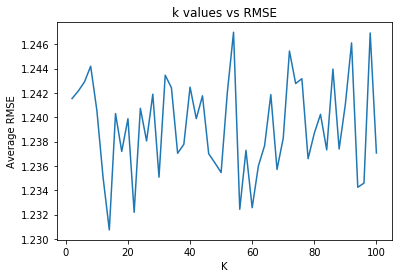

In [46]:
x = k_vals
y = test_rmse_avg_full
plt.title('k values vs RMSE')
plt.xlabel("K")
plt.ylabel("Average RMSE", rotation=90)
plt.plot(x,y)
if saveplots:
    plt.savefig("rmseVsk_Q13", format='png') 
plt.show()

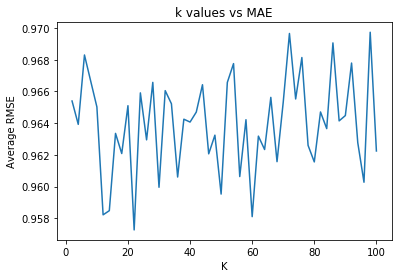

In [47]:
x = k_vals
y = test_mae_avg_full
plt.title('k values vs MAE')
plt.xlabel("K")
plt.ylabel("Average RMSE", rotation=90)
plt.plot(x,y)
if saveplots:
    plt.savefig("maeVsk_Q13", format='png') 
plt.show()

### Question 14

In [34]:
movie_numbers_with_less_than_five_ratings = []
for i in unique_movies:
    indexes = []
    for j in range(len(movie_id)):
        if(movie_id[j] == str(int(i))):
            indexes.append(j)
    if len(indexes) < 5:
        movie_numbers_with_less_than_five_ratings.append(i)

In [37]:
five_ratings_and_variance = []
for i in range(len(unique_movies)):
    if unique_movies[i] not in movie_numbers_with_less_than_five_ratings:
        if variance[i] > 2:
            five_ratings_and_variance.append(i)

In [38]:
five_ratings_and_variance_int = [int(i) for i in five_ratings_and_variance]

In [39]:
def trim_movies_question14(testset):
    removed_testset = []
    #print(len(testset))
    for j in range(len(testset)):
        if int(testset[j][1]) in five_ratings_and_variance_int:
            #print('yes!')
            removed_testset.append(testset[j])
    return removed_testset

In [40]:
from surprise import Dataset
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold
k_vals = np.arange(2,102,2)
test_rmse_avg_full = []
test_mae_avg_full = []
sim_options = {'name': 'pearson'}
test_rmse_avg_full = []
kf = KFold(n_splits=10)
file_path = os.path.expanduser('/Users/ashwin/Documents/Winter 2018/219/project3/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
for k in k_vals:
    print(k)
    test_rmse = []
    test_mae = []
    for trainset, testset in kf.split(data):
        removed_testset = trim_movies_question14(testset)
        algo = KNNBasic(k=k, sim_options=sim_options)
        algo.fit(trainset)
        predictions = algo.test(removed_testset)
        test_rmse.append(accuracy.rmse(predictions))
        test_mae.append(accuracy.mae(predictions))
    test_rmse_avg_full.append(np.mean(test_rmse))
    test_mae_avg_full.append(np.mean(test_mae))

2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2979
MAE:  1.0350
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2375
MAE:  1.0097
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2404
MAE:  0.9738
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1660
MAE:  0.9229
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3020
MAE:  0.9755
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1186
MAE:  0.9360
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1238
MAE:  0.8891
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4572
MAE:  1.1417
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2466
MAE:  0.9333
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
RMSE: 1.0978
MAE:  0.8598
18
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1290
MAE:  0.9091
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8187
MAE:  0.6593
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1547
MAE:  0.9260
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9603
MAE:  0.7610
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0933
MAE:  0.9154
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8783
MAE:  0.7170
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1459
MAE:  0.8619
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1714
MAE:  0.8987
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0681
MAE:  0.8439
Computing 

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2213
MAE:  0.9798
34
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2681
MAE:  1.0127
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0439
MAE:  0.8123
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1759
MAE:  0.9609
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9827
MAE:  0.7941
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0164
MAE:  0.7659
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2753
MAE:  0.9831
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1500
MAE:  0.8730
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9711
MAE:  0.7598
Computing the pearson similarity matrix...
Done computing similarity m

Done computing similarity matrix.
RMSE: 1.0093
MAE:  0.7348
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0469
MAE:  0.8892
50
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0381
MAE:  0.7792
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9056
MAE:  0.7266
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0041
MAE:  0.8112
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0461
MAE:  0.8652
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1129
MAE:  0.9157
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0689
MAE:  0.8911
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1707
MAE:  0.8791
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2202
MAE:  0.9511
Computing 

Done computing similarity matrix.
RMSE: 1.0886
MAE:  0.8558
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9309
MAE:  0.8003
66
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8916
MAE:  0.7045
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0033
MAE:  0.7997
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1285
MAE:  0.8605
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2486
MAE:  1.0775
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2325
MAE:  1.0190
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0713
MAE:  0.8685
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9782
MAE:  0.7739
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1133
MAE:  0.8501
Computing 

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0337
MAE:  0.7654
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4905
MAE:  1.2189
82
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9956
MAE:  0.8105
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1233
MAE:  0.8474
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1998
MAE:  0.9176
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9495
MAE:  0.7892
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9006
MAE:  0.6939
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0188
MAE:  0.8285
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9344
MAE:  0.7488
Computing the pearson similarity matrix...
Done computing similarity m

Done computing similarity matrix.
RMSE: 0.9526
MAE:  0.7823
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2686
MAE:  0.9305
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2191
MAE:  0.9612
98
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2518
MAE:  1.0451
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3158
MAE:  1.0541
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1183
MAE:  0.8574
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0784
MAE:  0.8403
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8189
MAE:  0.6424
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9957
MAE:  0.7452
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0281
MAE:  0.8519
Computing 

In [41]:
min_avg_rmse = np.min(test_rmse_avg_full)
print('Minimum average rmse is: %f' %(min_avg_rmse))

Minimum average rmse is: 1.055612


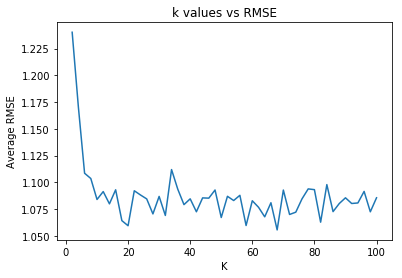

In [42]:
x = k_vals
y = test_rmse_avg_full
plt.title('k values vs RMSE')
plt.xlabel("K")
plt.ylabel("Average RMSE", rotation=90)
plt.plot(x,y)
if saveplots:
    plt.savefig("rmseVsk_Q14", format='png') 
plt.show()

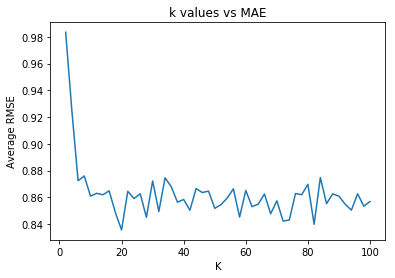

In [43]:
x = k_vals
y = test_mae_avg_full
plt.title('k values vs MAE')
plt.xlabel("K")
plt.ylabel("Average RMSE", rotation=90)
plt.plot(x,y)
if saveplots:
    plt.savefig("maeVsk_Q14", format='png') 
plt.show()

### Question 15

In [34]:
sim_options = {'name': 'pearson'}
kf = KFold(n_splits=10)
file_path = os.path.expanduser('/Users/ashwin/Documents/Winter 2018/219/project3/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
trainset, testset = train_test_split(data, test_size=.10)
algo = KNNBasic(k=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


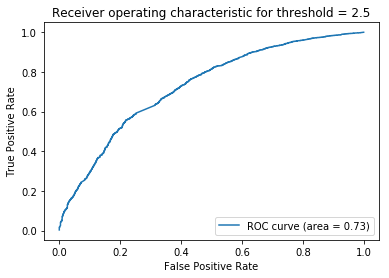

Area under the curve for Threshold = 2 is 0.727915


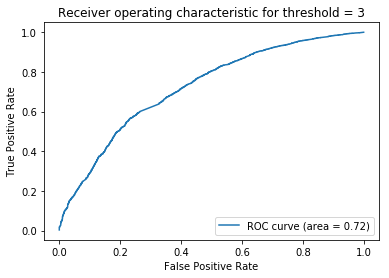

Area under the curve for Threshold = 3 is 0.722358


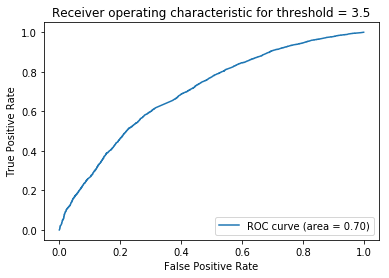

Area under the curve for Threshold = 3 is 0.700012


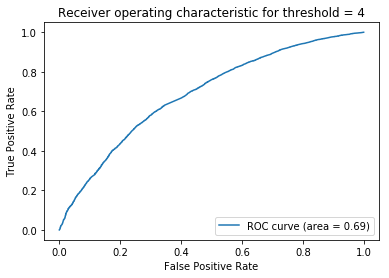

Area under the curve for Threshold = 4 is 0.688163


In [35]:
trueValue = []
predValue = []
thresholds = [2.5,3,3.5,4]
for threshold in thresholds:
    for i in range(len(testset)):
        if testset[i][2] >= threshold: #threshold
            trueValue.append(1)
        else:
            trueValue.append(0)

        predValue.append(predictions[i][3])

    fpr, tpr, thresholds = roc_curve(trueValue,predValue)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for threshold = ' + str(threshold))
    plt.legend(loc="lower right")
    plt.show()
    if saveplots:
         plt.savefig("roc_Q15", format='png') 
    plt.show()
    print ('Area under the curve for Threshold = %d is %f' %(threshold,roc_auc))